### Importing Required Libraries

In [1]:
import numpy as np
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from NeuralNet.NeuralNet import NeuralNet
from NeuralNet.utils import Utils
from NeuralNet.optimizers import Optimizers

### Loading Dataset
We here are using a breast cancer dataset which has 30 input features and 1 output feature to predict benign or mallignant cancer. There are 569 datapoint

In [2]:
data = load_breast_cancer()
X = data['data']
Y = data['target']

### 80-20 Train Test Split

In [3]:
X_train,X_test,y_train,y_test = train_test_split(X,Y,test_size=0.2)
X_train = X_train.reshape(len(X_train),1,30)
y_train = y_train.reshape(len(y_train),1,1)

In [4]:
print(X_train.shape)
print(X_test.shape)

(455, 1, 30)
(114, 30)


### Defining The Network
we here define a 4 layer network with 1 input, 1 output and 2 hidden layers. 

In [5]:
L = 4
N = [30,60,30,1]
utils = Utils()

### Defining the Optimizer and loss

#### Gradient Descent
$$ \theta_{t+1} = \theta_t - \eta\cdot\nabla \theta_t $$

In [6]:
FFN_grad_desc = NeuralNet(L,N)
opt_FFN = Optimizers(FFN_grad_desc,utils.cost_BCE)
opt_FFN.gradient_descent(100,X_train,y_train,0.01)

d:\Workspace\GitRepos\ML-DL-Fundamentals\Deep Learning\NeuralNet\utils.py:9: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-z))


#### Gradient Descent with Momentum
$$ v_t = \beta \cdot v_{t-1} + \nabla \theta_t $$
$$ \theta_{t+1} = \theta_t - \eta\cdot v_t $$

In [7]:
FFN_mom_grad_desc = NeuralNet(L,N)
opt_FFN_mom_grad_desc = Optimizers(FFN_mom_grad_desc,utils.cost_BCE)
opt_FFN_mom_grad_desc.gradient_descent_with_momentum(100,X_train,y_train,0.01,0.01)

### Loss vs Epoch
We see that Momentum with gradient descent has a higher slope as compared to vanilla gradient descent hence converges faster

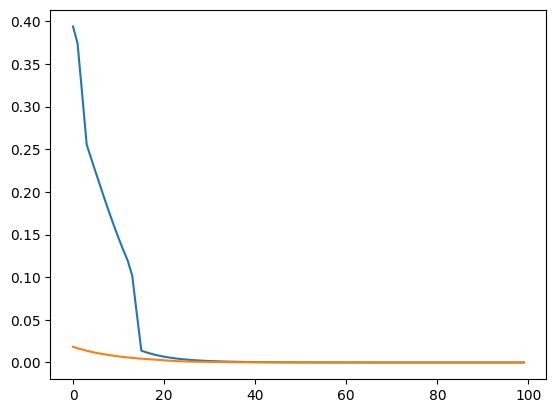

In [9]:
import matplotlib.pyplot as plt

plt.plot(range(100),opt_FFN.loss)
plt.plot(range(100),opt_FFN_mom_grad_desc.loss)